In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data_path = 'data/wrist/serial_20210307_131226.txt'

In [3]:
with open(data_path) as f:
    data = f.read()

In [4]:
data.split('\n')

['13:11:24.200 Connecting to ESP32test ...',
 '13:11:30.532 Connection failed: read failed, socket might closed or timeout, read ret: -1',
 '13:12:09.097 Connecting to ESP32test ...',
 '13:12:10.328 Connected',
 '13:12:10.353 acc -331.05  -349.18  -997.56 gyro -1.27  -0.14  -0.34 ',
 '13:12:10.353 ^@^@^@^@^@^@^@^@acc -331.54  -347.35  -998.84 gyro -0.36  0.02  -0.08 ',
 '13:12:10.354 ^@^@^@^@^@^@^@^@^@acc -334.96  -353.39  -1009.09 gyro -0.23  -0.08  0.11 ',
 '13:12:10.387 ^@^@^@^@^@^@^@^@acc -335.27  -347.96  -1000.61 gyro 0.56  0.25  0.02 ',
 '13:12:10.395 ^@',
 '13:12:10.395 ^@^@^@^@^@^@^@^@acc -329.77  -347.84  -990.72 gyro 0.26  0.58  0.08 ',
 '13:12:10.449 ^@^@',
 '13:12:10.449 ^@^@^@^@^@^@^@^@acc -326.60  -343.32  -991.33 gyro 0.05  0.43  0.18 ',
 '13:12:10.449 ^@^@',
 '13:12:10.449 ^@^@^@^@^@^@^@^@acc -331.79  -346.44  -999.57 gyro 0.68  -0.07  0.22 ',
 '13:12:10.503 ^@',
 '13:12:10.503 ^@^@^@^@^@^@^@^@acc -330.14  -350.83  -995.42 gyro 1.65  -0.01  0.34 ',
 '13:12:10.503 ^@',


In [5]:
timestamp = []
ax, ay, az = [], [], []
gx, gy, gz = [], [], []
for line in data.split('\n'):
    if 'acc' in line and 'gyro' in line:
        t = line.split(' ')
        timestamp.append(t[0])
        ax.append(t[2])
        ay.append(t[4])
        az.append(t[6])
        gx.append(t[8])
        gy.append(t[10])
        gz.append(t[12])

In [6]:
df = pd.DataFrame({'ax':ax, 'ay':ay, 'az':az, 'gx':gx, 'gy':gy, 'gz': gz}, dtype=np.float)

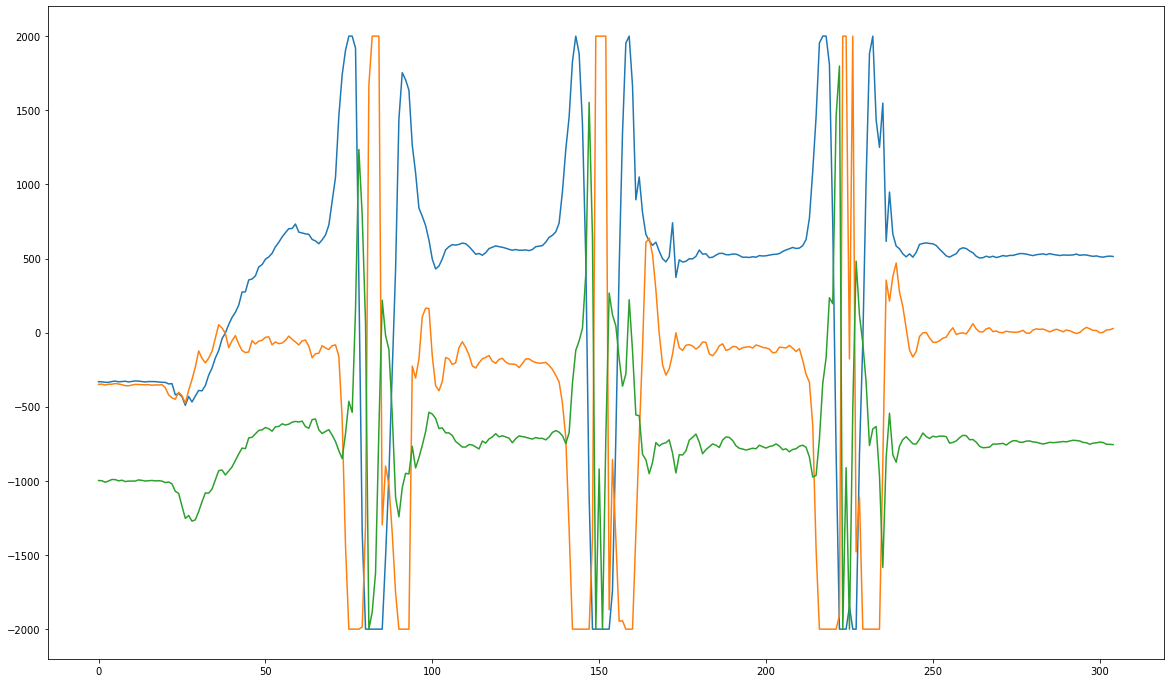

In [25]:
plt.figure(figsize=(20, 12))
acc = np.stack([df.ax, df.ay, df.az], axis=1)
plt.plot(acc)

In [23]:
rms = np.sum(acc ** 2, axis=1)

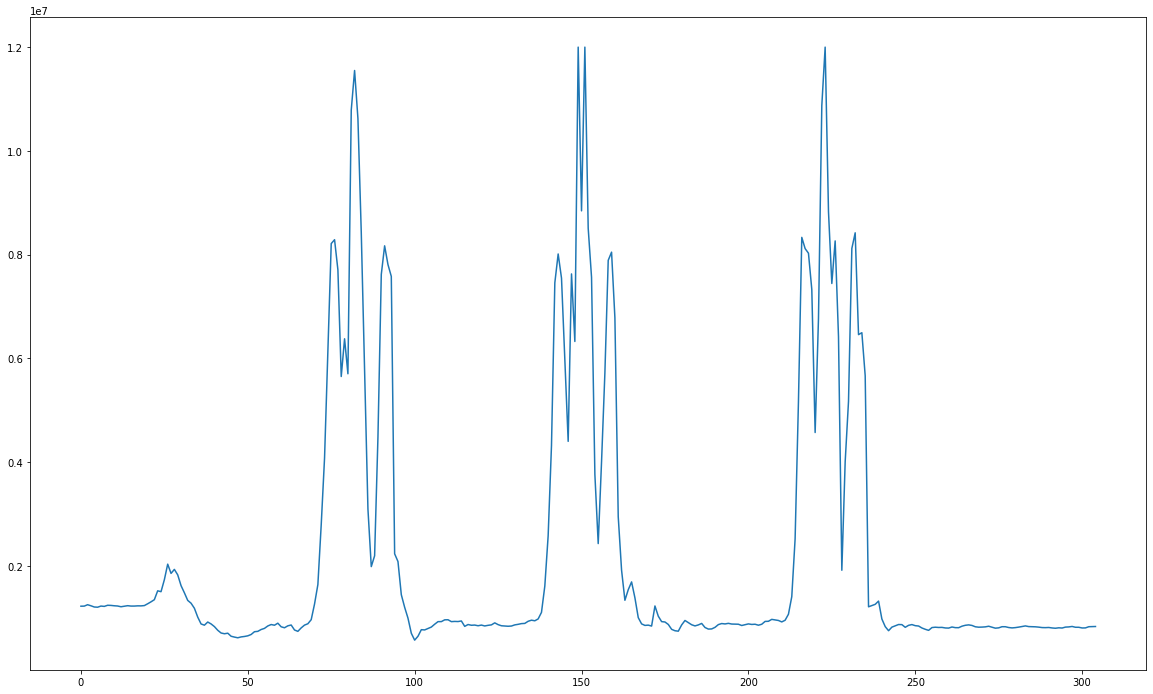

In [26]:
plt.figure(figsize=(20, 12))
plt.plot(rms)